In [14]:
from __future__ import absolute_import,unicode_literals,division,print_function
!pip install -q sklearn
%tensorflow_version 2.x
import tensorflow as tf









UsageError: Line magic function `%tensorflow_version` not found.


In [16]:
import seaborn as sns

import pandas as pd


In [8]:
CSV_COLUMNS=['SepalLength','SepalWidth','PetalLength','PetalWidth','Species']
SPECIES=['setosa','Versicolor','Virgincia']

In [9]:
Test_path="iris_test (1).csv"
Train_path = "iris_training.csv"

In [10]:

train=pd.read_csv(Train_path,names=CSV_COLUMNS,header=0)
test=pd.read_csv(Test_path,names=CSV_COLUMNS,header=0)



train.head() 
test.head()





,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,5.9,3.0,4.2,1.5,1
1,6.9,3.1,5.4,2.1,2
2,5.1,3.3,1.7,0.5,0
3,6.0,3.4,4.5,1.6,1
4,5.5,2.5,4.0,1.3,1


In [11]:
test.shape

(30, 5)

In [12]:
train.shape

(120, 5)

**Dataset:    **         
This specific dataset seperates flowers into 3 different classes of species.

Setosa                    
Versicolor             
Virginica                

The information about each flower is the following.

sepal length               
sepal width           
petal length                  
petal width                     

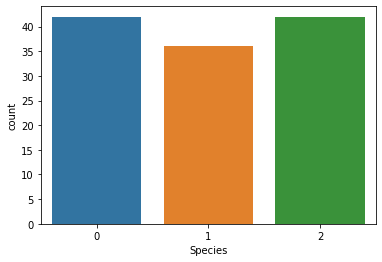

In [17]:
sns.countplot(x='Species',data=train)# 0 stands for setosa ,1 stands for versicolor,2 stands for virgincia

Separating dependent and Independent Variable


In [0]:
train_y = train.pop('Species')
test_y = test.pop('Species')


Data Cleaning

In [84]:
train.isnull().any()#To check any NAN values in training set

SepalLength    False
SepalWidth     False
PetalLength    False
PetalWidth     False
dtype: bool

In [85]:
test.isnull().any()#To check any NAN in the testing set

SepalLength    False
SepalWidth     False
PetalLength    False
PetalWidth     False
dtype: bool

Shuffling and Repeating the data to form an epoch

In [0]:
def input_fn(features, labels, training=True, batch_size=256):
    # Convert the inputs to a Dataset.
    dataset = tf.data.Dataset.from_tensor_slices((dict(features), labels))

    # Shuffle and repeat if you are in training mode.
    if training:
        dataset = dataset.shuffle(1000).repeat()
    
    return dataset.batch(batch_size)

Making the Feature headers , so to use the headers easily

In [87]:
# Feature columns describe how to use the input.
my_feature_columns = []
for key in train.keys():
    my_feature_columns.append(tf.feature_column.numeric_column(key=key))
print(my_feature_columns)

[NumericColumn(key='SepalLength', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='SepalWidth', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='PetalLength', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='PetalWidth', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None)]


I Have tried with Logistic Regression , but i dint get preferred accuracy

In [88]:
# Build a DNN with 2 hidden layers with 30 and 10 hidden nodes each.
classifier = tf.estimator.DNNClassifier(
    feature_columns=my_feature_columns,
    # Two hidden layers of 30 and 10 nodes respectively.
    hidden_units=[30, 10],
    # The model must choose between 3 classes.
    n_classes=3)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmpfpmwduv_', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


So I used DNN for classification

In [93]:
classifier.train(
    input_fn=lambda: input_fn(train, train_y, training=True),
    steps=500)
# We include a lambda to avoid creating an inner function previously
#Training the model

INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpfpmwduv_/model.ckpt-10000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 10000...
INFO:tensorflow:Saving checkpoints for 10000 into /tmp/tmpfpmwduv_/model.ckpt.
INFO:tensorflow:Calling checkpoint li

In [94]:
eval_result = classifier.evaluate(
    input_fn=lambda: input_fn(test, test_y, training=False))

print('\nTest set accuracy: {accuracy:0.3f}\n'.format(**eval_result))
#Predicting the Accuracy

INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-05-12T14:48:54Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpfpmwduv_/model.ckpt-10500
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Inference Time : 0.23628s
INFO:tensorflow:Finished evaluation at 2020-05-12-14:48:55
INFO:tensorflow:Saving dict for global step 10500: accuracy = 0.8666667, avera

In [95]:
def input_fn(features, batch_size=256):
    # Convert the inputs to a Dataset without labels.
    return tf.data.Dataset.from_tensor_slices(dict(features)).batch(batch_size)

features = ['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth']
predict = {}

print("Please type numeric values as prompted.")
for feature in features:
  valid = True
  while valid: 
    val = input(feature + ": ")
    if not val.isdigit(): valid = False

  predict[feature] = [float(val)]

predictions = classifier.predict(input_fn=lambda: input_fn(predict))
for pred_dict in predictions:
    class_id = pred_dict['class_ids'][0]
    probability = pred_dict['probabilities'][class_id]

    print('Prediction is "{}" ({:.1f}%)'.format(
        SPECIES[class_id], 100 * probability))

Please type numeric values as prompted.
SepalLength: 3.2
SepalWidth: 3.3
PetalLength: 4.1
PetalWidth: 2
PetalWidth: 2.3
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpfpmwduv_/model.ckpt-10500
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Prediction is "Virgincia" (75.5%)
